In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats as sts

# Python
## Построение нескольких графиков в 1 ячейке

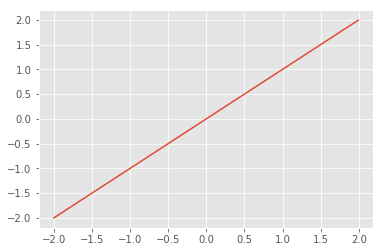

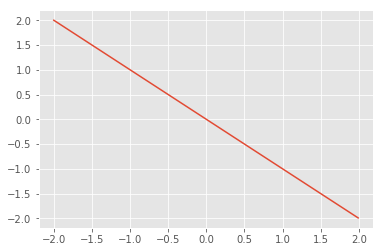

In [2]:
# Способ 1 - несколько show()
x = np.arange(-2, 2, 0.01)

plt.plot(x, x)
plt.show()

plt.plot(x, -x)
plt.show()

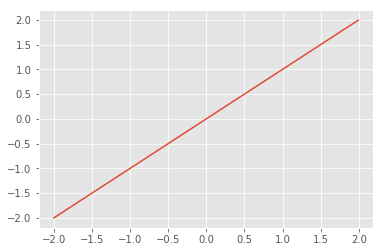

In [3]:
# Способ 2 - subplots

fig, ax = plt.subplots(1)
ax.plot(x, x)

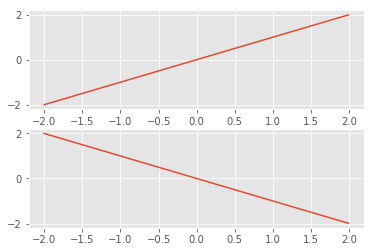

In [5]:
fig, ax = plt.subplots(2)
ax[0].plot(x, x)
ax[1].plot(x, -x)

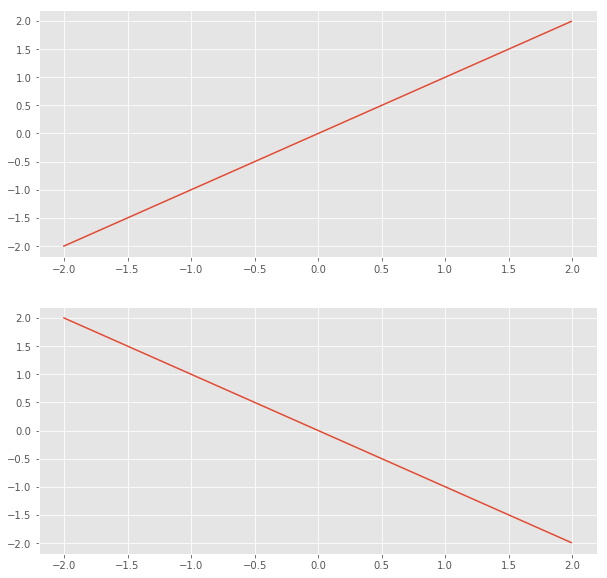

In [6]:
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].plot(x, x)
ax[1].plot(x, -x)

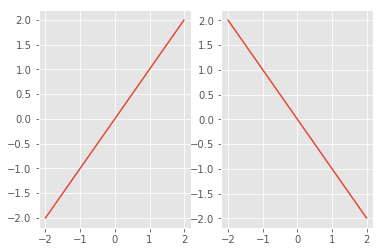

In [7]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, x)
ax[1].plot(x, -x)

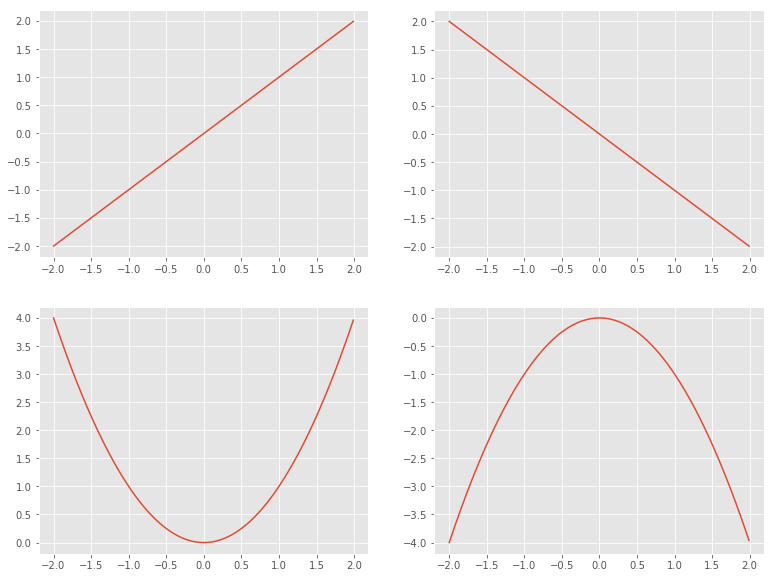

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
ax[0][0].plot(x, x)
ax[0][1].plot(x, -x)
ax[1][0].plot(x, x**2)
ax[1][1].plot(x, -x**2)

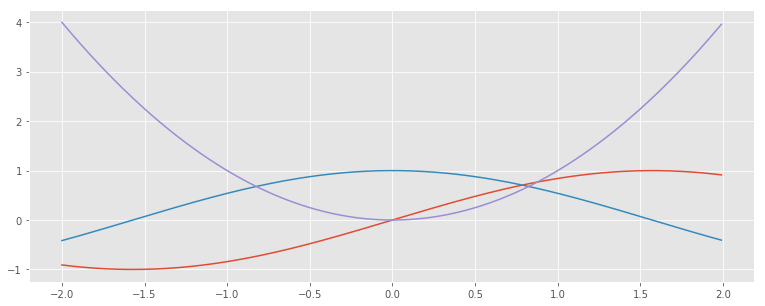

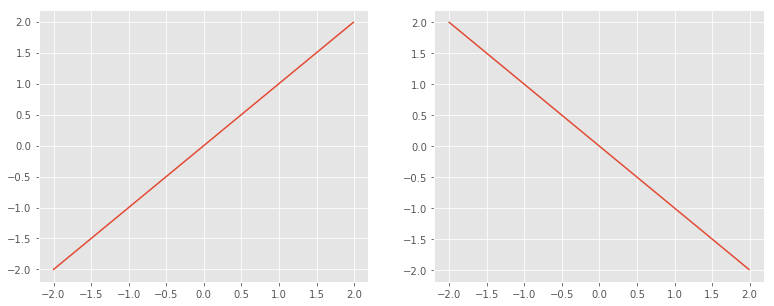

In [13]:
fig1, ax1 = plt.subplots(1, figsize=(13, 5))
fig2, ax2 = plt.subplots(1, 2, figsize=(13, 5))
ax1.plot(x, np.sin(x), x, np.cos(x))
ax1.plot(x, x**2)
ax2[0].plot(x, x)
ax2[1].plot(x, -x)

# Математика
## ЦПТ

Рассмотрим какое-нибудь сложное распределение, например <a href="https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0">Вейбулла</a>

**1 сложность** - в scipy 3 реализации этого распределения:

- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull
- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.frechet_r.html#scipy.stats.frechet_r
- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.frechet_l.html#scipy.stats.frechet_l

Заметим, что "двойной" Вейбулл это по сути сумма "левого" и "правого". При этом если посмотреть формулу на wiki - https://en.wikipedia.org/wiki/Weibull_distribution - то становится ясно, что нас интересует только правый.

**2 сложность** - в англоязычной и русскоязычной традициях часто принято использование различных параметров для одних и тех же распределений. Отличия не только в буквах, но и в величинах (иногда зависимость обратная, иногда с точностью до множителя!). **Обязательно используйте англоязычную вики как источник информации**


**3 сложность** - параметры распределения scipy могут отличаться от параметров в формуле Wiki! Внимательно изучите формулу в документации!

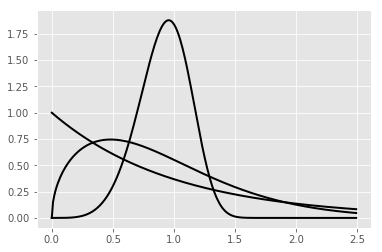

In [14]:
#Просто скопируем код из документации, чтобы посмотреть на график распределения с разными параметрами.
x = np.arange(0, 2.5, 0.01)
c = [1, 1.5, 5]

rv = sts.frechet_r(c[0])
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
rv = sts.frechet_r(c[1])
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
rv = sts.frechet_r(c[2])
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

Теперь разберёмся что есть что.

Посмотрим формулу из wiki:
    
$$
f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$$

формулы из scipy:

<code>c \* x\*\*(c-1) \* exp(-x\*\*c)</code>

или

$$f(x) = c x^{c-1} e^{- x^c}$$

и

- <code>frechet_r.pdf(y, c) / scale</code>

- <code>y = (x - loc) / scale</code>

т.е.

1. $c = k$
2. $loc = 0$
3. $scale = \lambda$

In [15]:
# Зададим параметры распределения:
k = 1
lam = 1

n = 75

In [26]:
rv = sts.frechet_r(c = k, scale = lam, loc = 0)
sample = rv.rvs(size=n)
sample

array([ 1.15401117,  2.82764042,  0.22167489,  0.82156813,  0.1186171 ,
        2.49824133,  0.54650504,  0.63965896,  0.05073574,  0.07257566,
        0.14850727,  0.60510582,  1.34445306,  0.10125094,  3.57789091,
        0.42005102,  0.13757286,  0.9379437 ,  0.85089085,  0.14864083,
        0.48791807,  0.46643069,  0.78010578,  2.63407108,  0.41938625,
        1.05520816,  0.03118011,  0.48524989,  0.26735422,  0.17200658,
        1.31028429,  0.36425203,  1.14564292,  3.79139818,  0.27431557,
        0.69783456,  0.8681764 ,  0.31909848,  0.11492028,  1.61401415,
        0.12261871,  1.50644191,  0.23266391,  0.9832593 ,  1.75785415,
        1.24305114,  0.62632981,  2.2568092 ,  2.95667947,  1.13856096,
        1.7293158 ,  0.42912294,  3.21221375,  0.67040006,  0.59194376,
        0.01932317,  0.9792871 ,  1.21957344,  0.32815243,  0.76162425,
        0.19144725,  0.09777316,  0.66768953,  0.14610374,  0.57817288,
        1.58703447,  0.40386921,  0.14708894,  1.69516093,  0.66

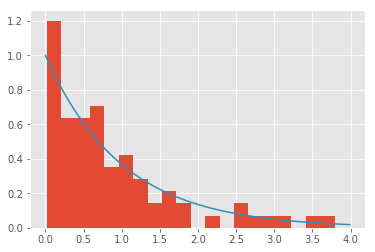

In [28]:
x = np.arange(0, 4, 0.01)
plt.hist(sample, normed=True, bins=20)
plt.plot(x, rv.pdf(x))

In [29]:
sample = rv.rvs(size=(1000, n))
sample.shape

(1000L, 75L)

In [31]:
means = sample.mean(axis=1)
means.shape

(1000L,)

(array([ 0.1038622 ,  0.25965551,  0.75300097,  1.5838986 ,  2.33689958,
         2.83024504,  3.37552161,  2.75234839,  3.1677972 ,  2.62252064,
         2.36286513,  1.60986415,  1.01265648,  0.64913877,  0.33755216,
         0.15579331,  0.02596555,  0.        ,  0.        ,  0.02596555]),
 array([ 0.70394607,  0.74245863,  0.7809712 ,  0.81948377,  0.85799633,
         0.8965089 ,  0.93502146,  0.97353403,  1.0120466 ,  1.05055916,
         1.08907173,  1.1275843 ,  1.16609686,  1.20460943,  1.243122  ,
         1.28163456,  1.32014713,  1.35865969,  1.39717226,  1.43568483,
         1.47419739]),
 <a list of 20 Patch objects>)

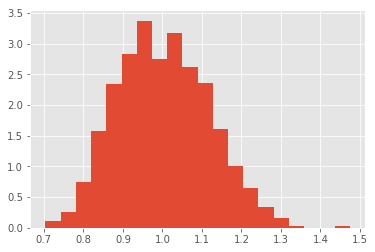

In [32]:
plt.hist(means, normed=True, bins=20)

Мат ожидание:

$$E = \lambda \, \Gamma(1+1/k)$$

Дисперсия:
    
$$\sigma ^{2} = \lambda^2\left[\Gamma\left(1+\frac{2}{k}\right) - \left(\Gamma\left(1+\frac{1}{k}\right)\right)^2\right]$$

, где Г - https://en.wikipedia.org/wiki/Gamma_function

scipy Gamma - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma

**Проблема 4** - неудачный выбор распределения приводит к сложным формулам для вычисления теоретических значений дисперсии и мат ожидания

In [33]:
from scipy.special import gamma

In [34]:
E = lam * gamma(1 + 1/k)
E

1.0

In [35]:
Var = lam**2 * (gamma(1 + 2/k) - gamma(1 + 1/k)**2)
Var

1.0

In [36]:
E_norm = E

In [37]:
Var_norm = Var / n

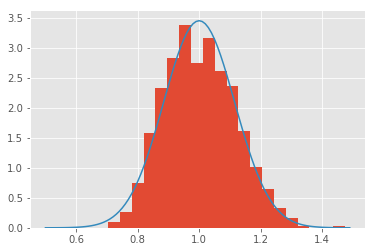

In [38]:
plt.hist(means, normed=True, bins=20)
x = np.arange(0.5, 1.5, 0.01)

rv_norm = sts.norm(E_norm, Var_norm**0.5)
plt.plot(x, rv_norm.pdf(x))